In [499]:
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVR
from sklearn.svm import SVC
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import matplotlib
from scipy import stats as st
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
import statsmodels.api as sm
from sklearn.model_selection import GridSearchCV
import pandas_profiling
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline
import time


In [500]:
data = pd.read_csv(r'C:\python\03_wdbc_data.data', sep=',', header=None)

In [504]:
data.head(60)

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,M,17.990,10.38,122.80,1001.0,0.11840,0.27760,0.300100,0.147100,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.711900,0.26540,0.4601,0.11890
1,842517,M,20.570,17.77,132.90,1326.0,0.08474,0.07864,0.086900,0.070170,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.241600,0.18600,0.2750,0.08902
2,84300903,M,19.690,21.25,130.00,1203.0,0.10960,0.15990,0.197400,0.127900,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.450400,0.24300,0.3613,0.08758
3,84348301,M,11.420,20.38,77.58,386.1,0.14250,0.28390,0.241400,0.105200,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.686900,0.25750,0.6638,0.17300
4,84358402,M,20.290,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.400000,0.16250,0.2364,0.07678
5,843786,M,12.450,15.70,82.57,477.1,0.12780,0.17000,0.157800,0.080890,...,15.470,23.75,103.40,741.6,0.17910,0.52490,0.535500,0.17410,0.3985,0.12440
6,844359,M,18.250,19.98,119.60,1040.0,0.09463,0.10900,0.112700,0.074000,...,22.880,27.66,153.20,1606.0,0.14420,0.25760,0.378400,0.19320,0.3063,0.08368
7,84458202,M,13.710,20.83,90.20,577.9,0.11890,0.16450,0.093660,0.059850,...,17.060,28.14,110.60,897.0,0.16540,0.36820,0.267800,0.15560,0.3196,0.11510
8,844981,M,13.000,21.82,87.50,519.8,0.12730,0.19320,0.185900,0.093530,...,15.490,30.73,106.20,739.3,0.17030,0.54010,0.539000,0.20600,0.4378,0.10720
9,84501001,M,12.460,24.04,83.97,475.9,0.11860,0.23960,0.227300,0.085430,...,15.090,40.68,97.65,711.4,0.18530,1.05800,1.105000,0.22100,0.4366,0.20750


In [506]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    object 
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

In [507]:
data.nunique()

0     569
1       2
2     456
3     479
4     522
5     539
6     474
7     537
8     537
9     542
10    432
11    499
12    540
13    519
14    533
15    528
16    547
17    541
18    533
19    507
20    498
21    545
22    457
23    511
24    514
25    544
26    411
27    529
28    539
29    492
30    500
31    535
dtype: int64

<AxesSubplot:>

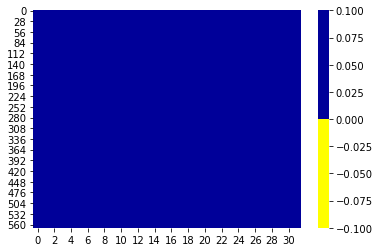

In [508]:
cols = data.columns
# определяем цвета 
# желтый - пропущенные данные, синий - не пропущенные
colours = ['#ffff00', '#000099'] 
sns.heatmap(data[cols].isnull(), cmap=sns.color_palette(colours))

In [509]:
for col in data.columns: # количество нулевых значений признака в %
    pct_missing = np.mean(data[col].isnull())
    print('{} - {}%'.format(col, round(pct_missing*100)))

0 - 0%
1 - 0%
2 - 0%
3 - 0%
4 - 0%
5 - 0%
6 - 0%
7 - 0%
8 - 0%
9 - 0%
10 - 0%
11 - 0%
12 - 0%
13 - 0%
14 - 0%
15 - 0%
16 - 0%
17 - 0%
18 - 0%
19 - 0%
20 - 0%
21 - 0%
22 - 0%
23 - 0%
24 - 0%
25 - 0%
26 - 0%
27 - 0%
28 - 0%
29 - 0%
30 - 0%
31 - 0%


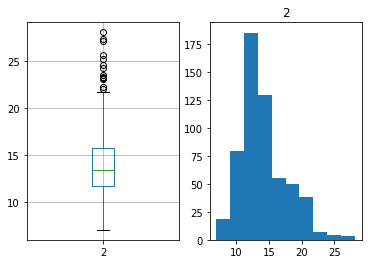

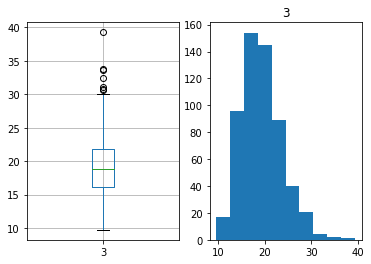

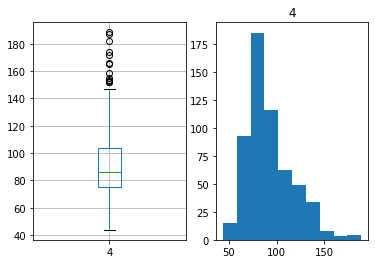

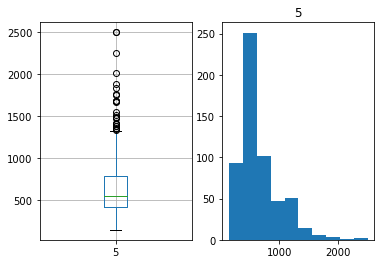

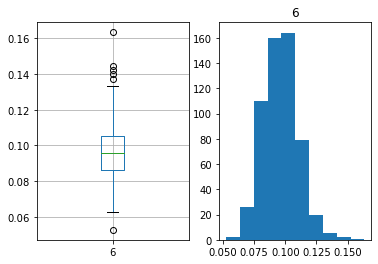

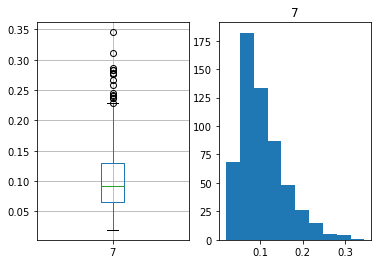

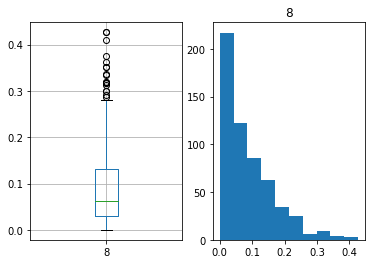

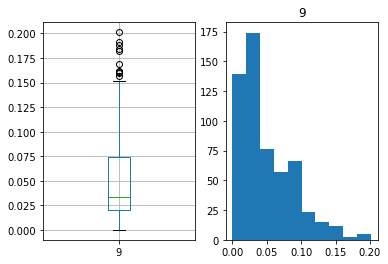

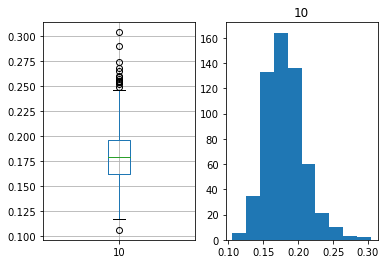

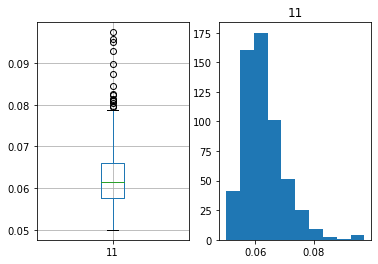

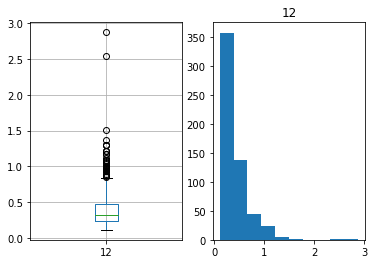

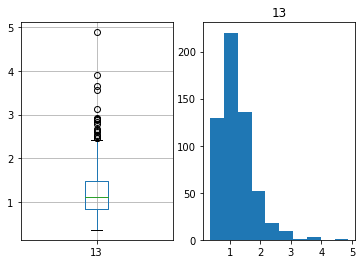

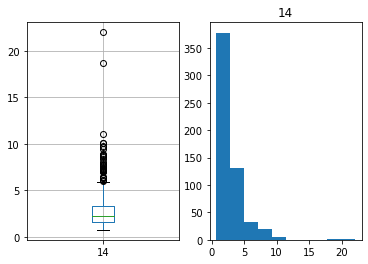

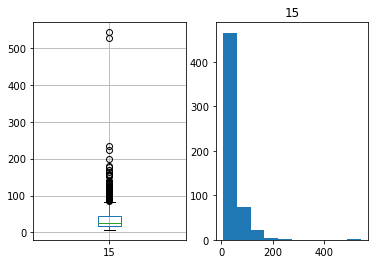

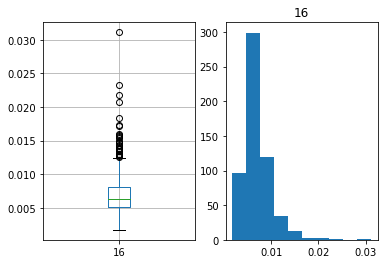

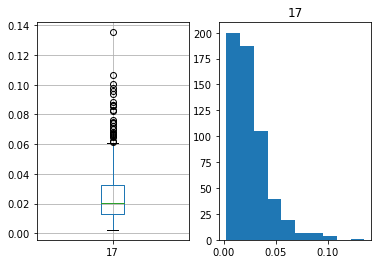

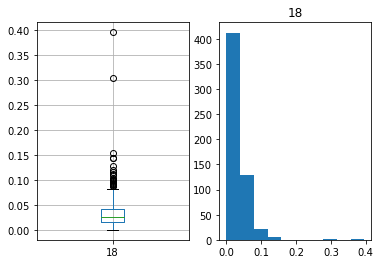

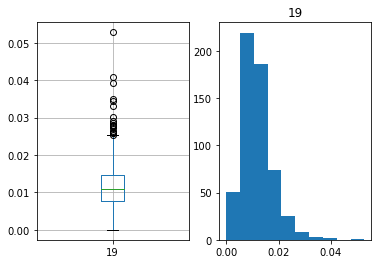

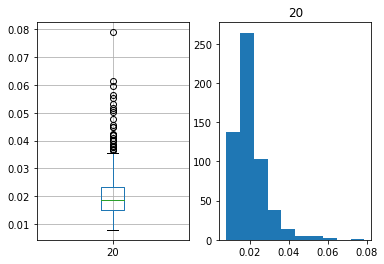

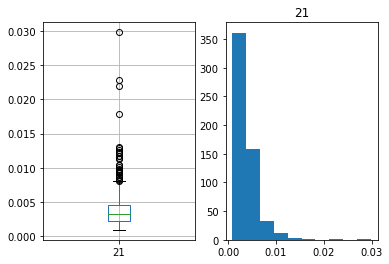

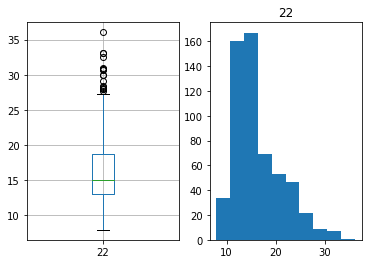

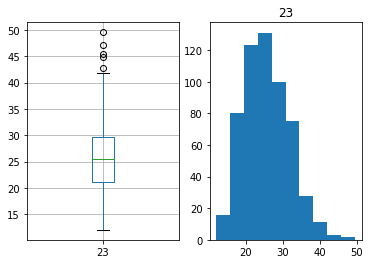

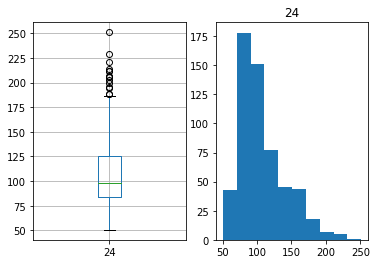

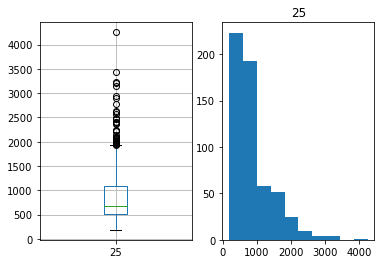

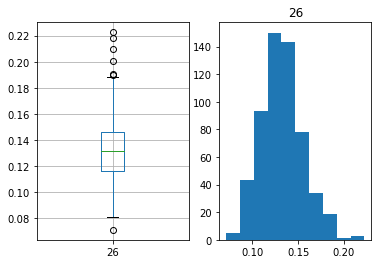

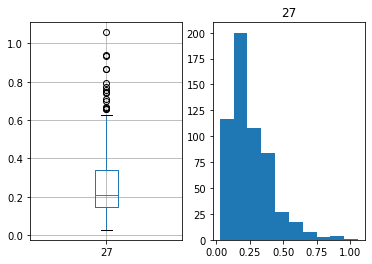

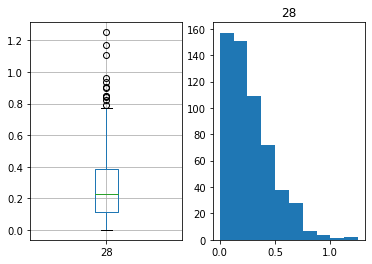

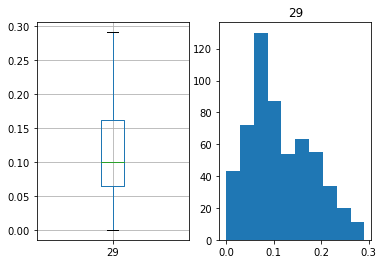

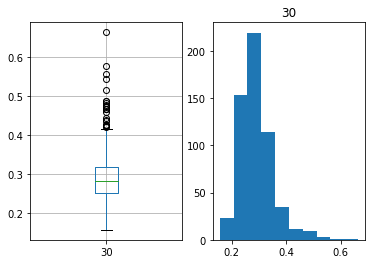

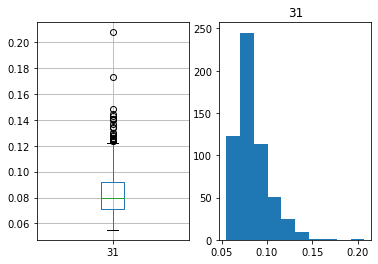

In [510]:
cols = data.drop(columns=[0,1])
# cols = data.drop(columns=['0','1']) # если бы были названия столбцов, то в кавычках

for column in cols:
    plt.figure()
    plt.subplot (1, 2, 1)
    cols.boxplot([column])
    plt.subplot (1, 2, 2)
    plt.hist(data[column])
    plt.title(column)
    # plt.title('column') # если бы были названия столбцов, то в кавычках


In [511]:
# выбросы 5 2000 6 0.145 7 0.28 12 1.6 13 4 14 12 15 250 16 0.02 17 0.1 18 0.16 19 0.04 20 0.062 21 0.017 22 34 24 230 25 3500
# 27 0.8 28 1 30 0.5 31 0.155 заменить в 5 столбце все что больше 2000 на 2000 и т.д.

In [512]:
# data.loc[data['count'] > 0, 'count'] = 1 # если были бы имена столбцов
# df['count'] = np.where(df['count'] > 0, 1, df['count'])
data[5] = np.where(data[5] > 2000, 2000, data[5])
data[6] = np.where(data[6] > 0.145, 0.145, data[6])
data[7] = np.where(data[7] > 0.28, 0.28, data[7])
data[12] = np.where(data[12] > 1.6, 1.6, data[12])
data[13] = np.where(data[13] > 4, 4, data[13])
data[14] = np.where(data[14] > 12, 12, data[14])
data[15] = np.where(data[15] > 250, 250, data[15])
data[16] = np.where(data[16] > 0.02, 0.02, data[16])
data[17] = np.where(data[17] > 0.1, 0.1, data[17])
data[18] = np.where(data[18] > 0.16, 0.16, data[18])
data[19] = np.where(data[19] > 0.04, 0.04, data[19])
data[20] = np.where(data[20] > 0.062, 0.062, data[20])
data[21] = np.where(data[21] > 0.017, 0.017, data[21])
data[22] = np.where(data[22] > 34, 34, data[22])
data[24] = np.where(data[24] > 230, 230, data[24])
data[25] = np.where(data[25] > 3500, 3500, data[25])
data[27] = np.where(data[27] > 0.8, 0.8, data[27])
data[28] = np.where(data[28] > 1, 1, data[28])
data[30] = np.where(data[30] > 0.5, 0.5, data[30])
data[31] = np.where(data[31] > 0.155, 0.155, data[31])

In [513]:
correlated_features = []
correlation_matrix = data.corr()

In [514]:
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) >= 0.7:
            colname = [i, j]
            correlated_features.append(colname)

correlated_features

[[3, 1],
 [4, 1],
 [4, 3],
 [7, 3],
 [7, 6],
 [8, 1],
 [8, 3],
 [8, 4],
 [8, 6],
 [8, 7],
 [11, 3],
 [11, 4],
 [11, 8],
 [13, 3],
 [13, 4],
 [13, 8],
 [13, 11],
 [14, 1],
 [14, 3],
 [14, 4],
 [14, 8],
 [14, 11],
 [14, 13],
 [16, 6],
 [17, 7],
 [17, 16],
 [18, 16],
 [18, 17],
 [20, 10],
 [20, 16],
 [20, 17],
 [21, 1],
 [21, 3],
 [21, 4],
 [21, 8],
 [21, 11],
 [21, 13],
 [21, 14],
 [22, 2],
 [23, 1],
 [23, 3],
 [23, 4],
 [23, 7],
 [23, 8],
 [23, 11],
 [23, 13],
 [23, 14],
 [23, 21],
 [24, 1],
 [24, 3],
 [24, 4],
 [24, 8],
 [24, 11],
 [24, 13],
 [24, 14],
 [24, 21],
 [24, 23],
 [25, 5],
 [26, 6],
 [26, 7],
 [27, 6],
 [27, 7],
 [27, 8],
 [27, 17],
 [27, 26],
 [28, 1],
 [28, 3],
 [28, 4],
 [28, 6],
 [28, 7],
 [28, 8],
 [28, 21],
 [28, 23],
 [28, 24],
 [28, 26],
 [28, 27],
 [29, 9],
 [30, 10],
 [30, 26]]

In [515]:
from sklearn import preprocessing as pr

class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns 

    def fit(self,X,y=None):
        return self 

    def transform(self,X):
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = pr.LabelEncoder().fit_transform(output[col].astype(str))
        else:
            for colname,col in output.iteritems():
                output[colname] = pr.LabelEncoder().fit_transform(col.astype(str))
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [516]:
data=MultiColumnLabelEncoder(columns = [1]).fit_transform(data)
data

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,31
0,842302,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,1,11.42,20.38,77.58,386.1,0.14250,0.28000,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.80000,0.6869,0.2575,0.5000,0.15500
4,84358402,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,926682,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,926954,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,927241,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.80000,0.9387,0.2650,0.4087,0.12400


In [517]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       569 non-null    int64  
 1   1       569 non-null    int32  
 2   2       569 non-null    float64
 3   3       569 non-null    float64
 4   4       569 non-null    float64
 5   5       569 non-null    float64
 6   6       569 non-null    float64
 7   7       569 non-null    float64
 8   8       569 non-null    float64
 9   9       569 non-null    float64
 10  10      569 non-null    float64
 11  11      569 non-null    float64
 12  12      569 non-null    float64
 13  13      569 non-null    float64
 14  14      569 non-null    float64
 15  15      569 non-null    float64
 16  16      569 non-null    float64
 17  17      569 non-null    float64
 18  18      569 non-null    float64
 19  19      569 non-null    float64
 20  20      569 non-null    float64
 21  21      569 non-null    float64
 22  22

In [518]:
data[1].value_counts(normalize=True) # количество наблюдений признака 1 в соотношении

0    0.627417
1    0.372583
Name: 1, dtype: float64

In [519]:
y = data[1]

In [520]:
X = data.drop(1,axis=1)

In [521]:
from sklearn.model_selection import train_test_split # обязательно делать стратификацию, раделение тестовой и тренировочной в соотношении, в этом примере 0.627417,  0.372583
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=data[1]) # 42 (можно взять другое число, но обычно берут это) нужно чтобы при каждом запуске модели train_test_split, выбранные значения были одинаковыми

In [522]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape # проверка исходного соотношения и после разделения

((398, 31), (171, 31), (398,), (171,))

In [523]:
from sklearn.preprocessing import StandardScaler # StandardScaler() нормализует объекты (каждый столбец X, ИНДИВИДУАЛЬНО !!!), так что каждый столбец/функция/переменная будет иметь mean = 0 и standard deviation = 1.
sc = StandardScaler()
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform (X_test)

In [524]:
from sklearn.ensemble import RandomForestRegressor

In [525]:
regr = RandomForestRegressor(max_depth=2, random_state=0, n_estimators=100) # пример для регрессии, поиск лучших признаков (ниже)
regr.fit(X_train_scaled, y_train)

RandomForestRegressor(max_depth=2, random_state=0)

In [526]:
print(regr.feature_importances_)

[0.00000000e+00 4.74174229e-04 6.94666188e-03 0.00000000e+00
 3.59835420e-03 8.77216585e-04 5.48783585e-03 1.01156715e-03
 1.69164256e-01 1.48584637e-04 0.00000000e+00 2.29101498e-04
 6.89436653e-04 0.00000000e+00 8.81039941e-04 1.19738160e-04
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.85917579e-03 1.84338280e-01 4.93132254e-03 4.10779148e-01
 8.65148432e-02 1.93112687e-02 1.37778791e-03 8.08375612e-03
 8.53301048e-02 7.25277476e-03 5.93571534e-04]


In [527]:
data_2 = X

In [528]:
importances = list(zip(regr.feature_importances_, data_2.columns)) # тут
importances.sort(reverse=True)
importances

[(0.41077914837154345, 24),
 (0.18433827981163364, 22),
 (0.16916425560699394, 9),
 (0.08651484322758071, 25),
 (0.08533010483402165, 29),
 (0.019311268710119355, 26),
 (0.00808375612451882, 28),
 (0.007252774764941215, 30),
 (0.0069466618771831965, 3),
 (0.005487835846609893, 7),
 (0.004931322535069815, 23),
 (0.0035983542038973194, 5),
 (0.0018591757898649324, 21),
 (0.001377787909601993, 27),
 (0.001011567148506271, 8),
 (0.0008810399414796642, 15),
 (0.0008772165850765254, 6),
 (0.0006894366527224854, 13),
 (0.000593571533815842, 31),
 (0.00047417422936626, 2),
 (0.00022910149848016096, 12),
 (0.00014858463668119857, 10),
 (0.00011973816029164013, 16),
 (0.0, 20),
 (0.0, 19),
 (0.0, 18),
 (0.0, 17),
 (0.0, 14),
 (0.0, 11),
 (0.0, 4),
 (0.0, 0)]

In [529]:
%%time
from sklearn.model_selection import RandomizedSearchCV # подбор параметров для к ближайших соседей

param_grid = {
    'n_neighbors': range(1, 50), # перебор числа случайных соседей от 1 до 50
    'p': range(1, 4)             # Ядром алгоритма K-ближайшего соседа является поиск k ближайших соседей. Почему вы находите
#     k ближайших соседей? Это потому, что расстояние между двумя точками экземпляра в пространстве признаков может отражать
#     сходство двух точек экземпляра и K ближайших соседей. Пространство признаков модели, как правило, представляет
#     собой n-мерное действительное векторное пространство. Евклидово расстояние может использоваться для измерения расстояния
#     между двумя экземплярами, и другие формулы расстояния могут использоваться для его измерения, такие как расстояние
#     Манхэттена, расстояние Чебышева и расстояние Минковского.
    
# по умолчанию p = 2 Евклидово расстояние, в данном случае перебирается Евклидово, Манхэттена, Минковского высокой степени.
}

knn = KNeighborsClassifier()

rand_search = RandomizedSearchCV(knn, param_grid, cv=5, scoring='f1', random_state=40) # cv = 5, 5 фолдов кросс-валидации,
# выборка делится на 5 частей, потом каждая часть является тестовой выборкой а остальные вместе тренировочной
# на будущее попробовать random_state=42 и сравнить
rand_search.fit(X_train_scaled, y_train)

print("Best CV score: {:.3f}, best CV k: {}".format(
    rand_search.best_score_, rand_search.best_estimator_.n_neighbors)
) 

test_predictions = rand_search.best_estimator_.predict(X_test_scaled)
print("Resulting test score: {:.3f}".format(f1_score(test_predictions, y_test)))

Best CV score: 0.934, best CV k: 13
Resulting test score: 0.926
Wall time: 2.29 s


In [530]:
x_result = pd.DataFrame(X_test_scaled)
x_result['predict'] = rand_search.best_estimator_.predict(X_test_scaled)
x_result

,0,1,2,3,4,5,6,7,8,9,...,22,23,24,25,26,27,28,29,30,predict
0,-0.249302,0.113702,-0.022757,0.096063,0.018220,-0.840560,-0.465336,-0.004036,-0.491044,-1.257434,...,0.404309,0.020756,-0.092937,-0.978852,0.091076,0.506567,-0.282461,-0.714004,-0.523952,0
1,-0.249396,-0.582321,-0.124679,-0.624337,-0.603654,-0.841969,-0.848252,-0.999032,-1.019701,-0.954736,...,0.186524,-0.619604,-0.566124,-0.137312,-0.763250,-1.101028,-0.960215,-0.037609,-0.165153,0
2,-0.255410,-1.794022,1.181780,-1.801388,-1.370264,-3.042148,-1.121600,-1.091673,-1.235829,-0.836610,...,0.728530,-1.432825,-1.085410,-1.775790,-1.229343,-1.318665,-1.727112,-0.052493,-0.769325,0
3,-0.249344,-0.869748,-0.604178,-0.859420,-0.812782,0.837579,-0.464572,-0.715928,-0.604353,-0.367798,...,0.085001,-0.815929,-0.727209,0.199304,-0.677620,-0.803311,-0.608162,0.157537,-0.282052,0
4,-0.249258,-0.387886,-0.634291,-0.384750,-0.462978,1.175743,0.177948,-0.613048,-0.473220,1.130923,...,-0.684614,-0.409022,-0.457498,0.645321,-0.350249,-0.631366,-0.515707,0.278263,0.109155,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,-0.191843,-0.511874,-0.675987,-0.520721,-0.529400,-0.288225,-0.650686,-0.675714,-0.657316,-0.345650,...,-0.443905,-0.525451,-0.480459,-0.612782,-0.439832,-0.496127,-0.423101,-0.470899,-0.439461,0
167,-0.249720,-0.182178,0.320073,-0.143524,-0.273283,0.407829,0.441370,0.219610,0.149089,-0.345650,...,0.016227,-0.003005,-0.252079,1.213360,1.129178,1.110792,1.672953,-0.158335,1.355115,1
168,-0.249665,0.082705,0.076849,0.105483,-0.031669,0.120389,0.223761,0.066400,0.250940,0.241288,...,0.808766,0.062338,-0.100179,0.460182,0.339404,0.224016,0.629443,-0.305521,0.569807,0
169,-0.249649,-0.618954,0.484539,-0.629661,-0.623087,0.131662,-0.455982,-0.681141,-0.724537,-0.463776,...,0.037514,-0.589903,-0.530092,0.750513,-0.073598,-0.592726,-0.635869,-0.768579,0.099896,0


In [531]:
# 2 вариант модель без обработки выбросов

In [532]:
data_3 = pd.read_csv(r'C:\python\03_wdbc_data.data', sep=',', header=None)
data_3 = MultiColumnLabelEncoder(columns = [1]).fit_transform(data_3)
y_2 = data_3[1]
X_2 = data_3.drop(1,axis=1)
from sklearn.model_selection import train_test_split # обязательно делать стратификацию, раделение тестовой и тренировочной в соотношении, в этом примере 0.627417,  0.372583
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X_2, y_2, test_size=0.3, random_state=42, stratify=data_3[1])
sc_2 = StandardScaler()
X_train_scaled_2 = sc_2.fit_transform(X_train_2)
X_test_scaled_2 = sc_2.transform (X_test_2)

In [533]:
%%time

knn_2 = KNeighborsClassifier()

rand_search_2 = RandomizedSearchCV(knn_2, param_grid, cv=5, scoring='f1', random_state=40)
rand_search_2.fit(X_train_scaled_2, y_train_2)

print("Best CV score: {:.3f}, best CV k: {}".format(
    rand_search_2.best_score_, rand_search_2.best_estimator_.n_neighbors)
) 

test_predictions_2 = rand_search_2.best_estimator_.predict(X_test_scaled_2)
print("Resulting test score: {:.3f}".format(f1_score(test_predictions_2, y_test_2)))

Best CV score: 0.938, best CV k: 13
Resulting test score: 0.917
Wall time: 2.32 s


In [534]:
# 3 вариант сначала разделение на тестовую и тренировочную, потом в тренировочной обработка выбросов

In [535]:
data_4 = pd.read_csv(r'C:\python\03_wdbc_data.data', sep=',', header=None)
data_4 = MultiColumnLabelEncoder(columns = [1]).fit_transform(data_4)
y_4 = data_4[1]
X_4 = data_4.drop(1,axis=1)
from sklearn.model_selection import train_test_split # обязательно делать стратификацию, раделение тестовой и тренировочной в соотношении, в этом примере 0.627417,  0.372583
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X_4, y_4, test_size=0.3, random_state=42, stratify=data_4[1])

In [536]:
X_train_3[5] = np.where(X_train_3[5] > 2000, 2000, X_train_3[5])
X_train_3[6] = np.where(X_train_3[6] > 0.145, 0.145, X_train_3[6])
X_train_3[7] = np.where(X_train_3[7] > 0.28, 0.28, X_train_3[7])
X_train_3[12] = np.where(X_train_3[12] > 1.6, 1.6, X_train_3[12])
X_train_3[13] = np.where(X_train_3[13] > 4, 4, X_train_3[13])
X_train_3[14] = np.where(X_train_3[14] > 12, 12, X_train_3[14])
X_train_3[15] = np.where(X_train_3[15] > 250, 250, X_train_3[15])
X_train_3[16] = np.where(X_train_3[16] > 0.02, 0.02, X_train_3[16])
X_train_3[17] = np.where(X_train_3[17] > 0.1, 0.1, X_train_3[17])
X_train_3[18] = np.where(X_train_3[18] > 0.16, 0.16, X_train_3[18])
X_train_3[19] = np.where(X_train_3[19] > 0.04, 0.04, X_train_3[19])
X_train_3[20] = np.where(X_train_3[20] > 0.062, 0.062, X_train_3[20])
X_train_3[21] = np.where(X_train_3[21] > 0.017, 0.017, X_train_3[21])
X_train_3[22] = np.where(X_train_3[22] > 34, 34, X_train_3[22])
X_train_3[24] = np.where(X_train_3[24] > 230, 230, X_train_3[24])
X_train_3[25] = np.where(X_train_3[25] > 3500, 3500, X_train_3[25])
X_train_3[27] = np.where(X_train_3[27] > 0.8, 0.8, X_train_3[27])
X_train_3[28] = np.where(X_train_3[28] > 1, 1, X_train_3[28])
X_train_3[30] = np.where(X_train_3[30] > 0.5, 0.5, X_train_3[30])
X_train_3[31] = np.where(X_train_3[31] > 0.155, 0.155, X_train_3[31])

In [537]:
sc_3 = StandardScaler()
X_train_scaled_3 = sc_3.fit_transform(X_train_3)
X_test_scaled_3 = sc_3.transform (X_test_3)

In [538]:
%%time

knn_3 = KNeighborsClassifier()

rand_search_3 = RandomizedSearchCV(knn_3, param_grid, cv=5, scoring='f1', random_state=40)
rand_search_3.fit(X_train_scaled_3, y_train_3)

print("Best CV score: {:.3f}, best CV k: {}".format(
    rand_search_3.best_score_, rand_search_3.best_estimator_.n_neighbors)
) 

test_predictions_3 = rand_search_3.best_estimator_.predict(X_test_scaled_3)
print("Resulting test score: {:.3f}".format(f1_score(test_predictions_3, y_test_3)))

Best CV score: 0.934, best CV k: 13
Resulting test score: 0.926
Wall time: 2.24 s


In [539]:
data_5 = data

In [540]:
def corr_feature_detect(data,threshold=0.8):
    
    corrmat = data.corr()
    corrmat = corrmat.abs().unstack() 
    corrmat = corrmat.sort_values(ascending=False)
    corrmat = corrmat[corrmat >= threshold]
    corrmat = corrmat[corrmat < 1] 
    corrmat = pd.DataFrame(corrmat).reset_index()
    corrmat.columns = ['feature1', 'feature2', 'corr']
   
    grouped_feature_ls = []
    correlated_groups = []
    
    for feature in corrmat.feature1.unique():
        if feature not in grouped_feature_ls:
    
            correlated_block = corrmat[corrmat.feature1 == feature]
            grouped_feature_ls = grouped_feature_ls + list(
                correlated_block.feature2.unique()) + [feature]
    
            correlated_groups.append(correlated_block)
    return correlated_groups

In [541]:
corr = corr_feature_detect(data_5,threshold=0.9)
for i in corr:
    print(i,'\n')

    feature1  feature2      corr
0          4         2  0.997855
6          4         5  0.990230
13         4        24  0.970334
17         4        22  0.969372
31         4        25  0.944100 

    feature1  feature2      corr
20        14        12  0.966852
35        14        15  0.933984 

    feature1  feature2      corr
36         8         9  0.921391 

    feature1  feature2      corr
38         3        23  0.912045 

    feature1  feature2      corr
40        29         9  0.910155 

    feature1  feature2     corr
42        28        27  0.90079 



In [542]:
data_5 = data_5.drop(columns=[2,5,9,12,15,23,27])

In [543]:
col_correlations = data_5.corr() # по умолчанию Пирсон
col_correlations.loc[:, :] = np.tril(col_correlations, k=-1)
cor_pairs = col_correlations.stack()
cor_pairs_to_dict = cor_pairs.to_dict()

In [544]:
for k, value in cor_pairs_to_dict.items():
    if abs(value) >= 0.85:
        print(k)

(8, 7)
(18, 17)
(22, 4)
(24, 4)
(24, 22)
(25, 4)
(25, 22)
(25, 24)
(28, 8)
(29, 8)
(29, 28)


In [545]:
corr = corr_feature_detect(data_5,threshold=0.9)
for i in corr:
    print(i,'\n')

   feature1  feature2      corr
0        22        24  0.993696
3        22        25  0.986046
8        22         4  0.969372 



In [546]:
data_5 = data_5.drop(columns=[24,25,4])

In [547]:
col_correlations = data_5.corr() # по умолчанию Пирсон
col_correlations.loc[:, :] = np.tril(col_correlations, k=-1)
cor_pairs = col_correlations.stack()
cor_pairs_to_dict = cor_pairs.to_dict()

In [548]:
for k, value in cor_pairs_to_dict.items():
    if abs(value) >= 0.85:
        print(k)

(8, 7)
(18, 17)
(28, 8)
(29, 8)
(29, 28)


In [549]:
corr = corr_feature_detect(data_5,threshold=0.9)
for i in corr:
    print(i,'\n')

In [550]:
data_5 = data_5.drop(columns=[8,17,28])

In [551]:
col_correlations = data_5.corr() # по умолчанию Пирсон
col_correlations.loc[:, :] = np.tril(col_correlations, k=-1)
cor_pairs = col_correlations.stack()
cor_pairs_to_dict = cor_pairs.to_dict()

In [552]:
for k, value in cor_pairs_to_dict.items():
    if abs(value) >= 0.85:
        print(k)

In [553]:
def quality_report(prediction, actual):
    print("Accuracy: {:.3f}\nPrecision: {:.3f}\nRecall: {:.3f}\nf1_score: {:.3f}".format(
        accuracy_score(prediction, actual),
        precision_score(prediction, actual),
        recall_score(prediction, actual),
        f1_score(prediction, actual)
    ))

In [554]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()

log_reg.fit(X_train_scaled, y_train)
print("Train quality:")
quality_report(log_reg.predict(X_train_scaled), y_train)
print("\nTest quality:")
quality_report(log_reg.predict(X_test_scaled), y_test)

Train quality:
Accuracy: 0.990
Precision: 0.973
Recall: 1.000
f1_score: 0.986

Test quality:
Accuracy: 0.971
Precision: 0.938
Recall: 0.984
f1_score: 0.960


In [555]:
importances = list(zip(log_reg.coef_[0], X.columns))
importances.sort(reverse=True)
importances

[(1.452799290320308, 23),
 (1.1394727773718762, 12),
 (0.9606724203817767, 30),
 (0.9456619732416535, 15),
 (0.873299394241719, 9),
 (0.8569612937264165, 25),
 (0.8288433731522327, 22),
 (0.779464157014692, 28),
 (0.7061715491342195, 14),
 (0.6961132413547156, 29),
 (0.6957868611415108, 8),
 (0.6945266353732181, 24),
 (0.6330382137022185, 26),
 (0.4972949819018516, 3),
 (0.4444208900855011, 19),
 (0.4167047031078519, 5),
 (0.35991707574678283, 6),
 (0.2972645880601406, 4),
 (0.2885624969263845, 2),
 (0.21159347538562998, 18),
 (0.16431433414897628, 0),
 (0.06083606107764133, 31),
 (-0.09188202629877429, 11),
 (-0.10102017544686066, 20),
 (-0.10650978891942116, 16),
 (-0.20719103172744038, 27),
 (-0.2779603603113804, 10),
 (-0.39052248341199214, 13),
 (-0.43832230691421986, 7),
 (-0.5255193833660405, 21),
 (-0.95859710960108, 17)]

In [556]:
y_4 = data_5[1]
X_4 = data_5.drop(1,axis=1)
from sklearn.model_selection import train_test_split # обязательно делать стратификацию, раделение тестовой и тренировочной в соотношении, в этом примере 0.627417,  0.372583
X_train_4, X_test_4, y_train_4, y_test_4 = train_test_split(X_4, y_4, test_size=0.3, random_state=42, stratify=data_5[1])
sc_4 = StandardScaler()
X_train_scaled_4 = sc_4.fit_transform(X_train_4)
X_test_scaled_4 = sc_4.transform (X_test_4)

In [557]:
from sklearn.linear_model import LogisticRegression

log_reg_2 = LogisticRegression()

log_reg_2.fit(X_train_scaled_4, y_train_4)
print("Train quality:")
quality_report(log_reg_2.predict(X_train_scaled_4), y_train_4)
print("\nTest quality:")
quality_report(log_reg_2.predict(X_test_scaled_4), y_test_4)

Train quality:
Accuracy: 0.982
Precision: 0.959
Recall: 0.993
f1_score: 0.976

Test quality:
Accuracy: 0.977
Precision: 0.938
Recall: 1.000
f1_score: 0.968


In [558]:
from sklearn.metrics import roc_auc_score, roc_curve

In [559]:
prediction = log_reg.predict_proba(X_test_scaled)[:,1] # roc auc исходных данных

auc_score = roc_auc_score(y_test, prediction)

auc_score

0.9976635514018691

In [560]:
prediction_2 = log_reg_2.predict_proba(X_test_scaled_4)[:,1] # roc auc с удалением всех коррелированных признаков

auc_score_2 = roc_auc_score(y_test_4, prediction_2)

auc_score_2

0.9985397196261682

In [561]:
# эконометрический подод, статистически значимые признаки p < 0.05
# Обязательно удалять коррелированные признаки, иначе вылазит ошибка LinAlgError: singular matrix

In [562]:
X_train_scaled_5 = pd.DataFrame(X_train_scaled_4, columns=X_4.columns)

In [563]:
X_train_scaled_5.head()

,0,3,6,7,10,11,13,14,16,18,19,20,21,22,26,29,30,31
0,-0.191838,1.049745,2.310001,3.390552,4.032390,2.639773,1.232968,3.176564,1.316734,3.037673,2.372103,5.093917,0.976709,1.459510,1.335383,2.049399,3.468399,0.923398
1,-0.249409,-0.909945,-0.063487,0.662798,-0.116781,-0.401530,-0.860612,-0.116829,-0.395502,0.227917,0.501410,-0.698688,-0.253806,0.508294,0.477013,1.255850,0.192266,0.437283
2,-0.188832,-0.993336,-0.925101,-0.513439,-0.079867,-0.512454,-1.239607,-0.952760,-0.631920,-0.268818,-0.526977,-0.269108,0.496267,-0.362451,-0.196219,-0.140014,0.800856,0.734739
3,6.319678,1.418055,0.337378,0.233305,-1.866520,-0.555982,0.831702,0.505742,4.944064,4.392759,4.572724,0.167816,3.798824,0.365921,-0.330866,-0.072253,-2.149483,-0.897220
4,-0.249672,-0.972488,1.225058,0.601714,1.116158,0.117991,-0.879755,0.531455,-0.520310,0.509479,0.771951,0.476233,0.484675,0.008957,-0.187804,0.376471,0.410565,0.060543


In [564]:
model_5 = sm.Logit(y_train_4.values, X_train_scaled_5)
result = model_5.fit()
result.summary()

Optimization terminated successfully.
         Current function value: 0.055296
         Iterations 12


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  398
Model:                          Logit   Df Residuals:                      380
Method:                           MLE   Df Model:                           17
Date:                Sun, 16 Jan 2022   Pseudo R-squ.:                  0.9162
Time:                        20:47:07   Log-Likelihood:                -22.008
converged:                       True   LL-Null:                       -262.66
Covariance Type:            nonrobust   LLR p-value:                 1.641e-91
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
0             -0.0458      0.495     -0.093      0.926      -1.015       0.924
3              3.3489      1.088      3.079      0.002       1.217       5.480
6              3.4320      2.344      1.464      0.143      -1.162       8.026
7             -7.5412      3.026     -2.492      0.013     -13.473      -1.610
10            -1.3977      1.086     -1.287      0.198      -3.526       0.730
11             2.0765      1.704      1.219      0.223      -1.263       5.416
13             1.1086      0.712      1.557      0.119      -0.287       2.504
14             4.7629      1.934      2.463      0.014       0.973       8.553
16             0.7772      1.555      0.500      0.617      -2.271       3.826
18             2.6198      1.404      1.865      0.062      -0.133       5.373
19            -0.8382      2.024     -0.414      0.679      -4.805       3.129
20             0.6649      1.096      0.607      0.544      -1.483       2.813
21            -4.3654      2.476     -1.763      0.078      -9.217       0.487
22            10.2164      2.950      3.463      0.001       4.434      15.999
26            -0.0058      2.182     -0.003      0.998      -4.282       4.270
29             6.8872      3.481      1.978      0.048       0.064      13.710
30             1.7179      1.194      1.439      0.150      -0.623       4.058
31             1.7384      2.641      0.658      0.510      -3.438       6.915
==============================================================================

Possibly complete quasi-separation: A fraction 0.64 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [565]:
model_5 = sm.Logit(y_train_4.values, X_train_scaled_5)
result = model_5.fit()
result.summary()
col = X_train_scaled_5.columns.tolist()

for i in range(len(col)):
    
    model_5 = sm.Logit(y_train_4.values, X_train_scaled_5[col])
    result = model_5.fit()
    
    potentially_bad = np.argmax(result.pvalues) # номер признака с максимальным pvalue
    
    if result.pvalues.max() > 0.05:
        col.pop(potentially_bad)

Optimization terminated successfully.
         Current function value: 0.055296
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.055296
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.055296
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.055308
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.055568
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.056003
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.057540
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.058467
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.062825
         Iterations 12
Optimization terminated successfully.
         Current function value: 0.

In [566]:
result.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                      y   No. Observations:                  398
Model:                          Logit   Df Residuals:                      388
Method:                           MLE   Df Model:                            9
Date:                Sun, 16 Jan 2022   Pseudo R-squ.:                  0.9019
Time:                        20:47:07   Log-Likelihood:                -25.758
converged:                       True   LL-Null:                       -262.66
Covariance Type:            nonrobust   LLR p-value:                 2.337e-96
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
3              3.1025      0.756      4.105      0.000       1.621       4.584
6              2.2252      0.768      2.897      0.004       0.720       3.731
7             -5.6718      1.763     -3.217      0.001      -9.127      -2.217
11             3.4229      1.194      2.867      0.004       1.083       5.763
14             3.2472      1.165      2.787      0.005       0.964       5.531
18             1.6174      0.756      2.140      0.032       0.136       3.099
21            -2.5759      1.129     -2.281      0.023      -4.790      -0.362
22             9.4942      2.217      4.283      0.000       5.150      13.838
29             4.5897      1.612      2.847      0.004       1.430       7.749
30             0.9589      0.481      1.992      0.046       0.015       1.903
==============================================================================

Possibly complete quasi-separation: A fraction 0.57 of observations can be
perfectly predicted. This might indicate that there is complete
quasi-separation. In this case some parameters will not be identified.
"""

In [567]:
# и в конце логистическая регрессия со статистически значимыми признаками

In [568]:
y_8 = data[1]
X_8 = data[[3, 6, 7, 11, 14, 18, 21, 22, 29, 30]]
from sklearn.model_selection import train_test_split # обязательно делать стратификацию, раделение тестовой и тренировочной в соотношении, в этом примере 0.627417,  0.372583
X_train_8, X_test_8, y_train_8, y_test_8 = train_test_split(X_8, y_8, test_size=0.3, random_state=42, stratify=data_5[1])
sc_8 = StandardScaler()
X_train_scaled_8 = sc_8.fit_transform(X_train_8)
X_test_scaled_8 = sc_8.transform (X_test_8)

In [569]:
from sklearn.linear_model import LogisticRegression

log_reg_4 = LogisticRegression()

log_reg_4.fit(X_train_scaled_8, y_train_8)
print("Train quality:")
quality_report(log_reg_4.predict(X_train_scaled_8), y_train_8)
print("\nTest quality:")
quality_report(log_reg_4.predict(X_test_scaled_8), y_test_8)

Train quality:
Accuracy: 0.977
Precision: 0.959
Recall: 0.979
f1_score: 0.969

Test quality:
Accuracy: 0.977
Precision: 0.938
Recall: 1.000
f1_score: 0.968


In [570]:
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import StratifiedKFold

In [571]:
sfk = StratifiedKFold(n_splits=5) # как есть, но после обработки выбросов

logit_cv = LogisticRegressionCV(Cs=1000, cv=sfk, solver='lbfgs') # cs сила регуляризации (пробовать разные), cv фолды, в данном случае 5

logit_cv.fit(X_train_scaled, y_train)

print("Train quality:")
quality_report(logit_cv.predict(X_train_scaled), y_train)
print("\nTest quality:")
quality_report(logit_cv.predict(X_test_scaled), y_test)

Train quality:
Accuracy: 0.990
Precision: 0.973
Recall: 1.000
f1_score: 0.986

Test quality:
Accuracy: 0.971
Precision: 0.938
Recall: 0.984
f1_score: 0.960


In [572]:
sfk = StratifiedKFold(n_splits=5) # со статистически значимыми признаками

logit_cv = LogisticRegressionCV(Cs=1000, cv=sfk, solver='lbfgs')

logit_cv.fit(X_train_scaled_8, y_train_8)

print("Train quality:")
quality_report(logit_cv.predict(X_train_scaled_8), y_train_8)
print("\nTest quality:")
quality_report(logit_cv.predict(X_test_scaled_8), y_test_8)

Train quality:
Accuracy: 0.980
Precision: 0.959
Recall: 0.986
f1_score: 0.973

Test quality:
Accuracy: 0.977
Precision: 0.938
Recall: 1.000
f1_score: 0.968


In [575]:
svс = GridSearchCV(SVC(kernel='rbf'), cv=5, # метод опорных векторов как есть, но после обработки выбросов, для классификации, если ставить cv 3 хуже работает
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3], # здесь rbf работает лучше, чем poly
                               "gamma": np.logspace(-2, 2, 5)})

In [576]:
svс.fit(X_train_scaled, y_train)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1.0, 10.0, 100.0, 1000.0],
                         'gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])})

In [577]:
y_pred = svс.predict(X_test_scaled)

In [578]:
auc_score_5 = roc_auc_score(y_test, y_pred)
auc_score_5

0.9609375

In [579]:
f1_score(y_test, y_pred)

0.959349593495935

In [580]:
svс_2 = GridSearchCV(SVC(kernel='rbf'), cv=5, # метод опорных векторов со статистически важныит признаками для классификации, если ставить cv 3 хуже работает
                   param_grid={"C": [1e0, 1e1, 1e2, 1e3], # здесь rbf работает лучше, чем poly
                               "gamma": np.logspace(-2, 2, 5)})

In [581]:
svс_2.fit(X_train_scaled_8, y_train_8)

GridSearchCV(cv=5, estimator=SVC(),
             param_grid={'C': [1.0, 10.0, 100.0, 1000.0],
                         'gamma': array([1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02])})

In [582]:
y_pred = svс_2.predict(X_test_scaled_8)

In [583]:
auc_score_6 = roc_auc_score(y_test_8, y_pred)
auc_score_6

0.96875

In [584]:
f1_score(y_test_8, y_pred)

0.967741935483871

In [585]:
def randomized_cv(model, param_grid, x_train, y_train):
    grid_search = RandomizedSearchCV(model, param_grid, cv=5, scoring='f1') # названия ошибок https://scikit-learn.org/stable/modules/model_evaluation.html#scoring-parameter
    t_start = time.time()
    grid_search.fit(x_train, y_train)
    t_end = time.time()
    print('model {} best f1 score is {}'.format(model.__class__.__name__, grid_search.best_score_))
    print('time for training is {} seconds'.format(t_end - t_start))
    print(grid_search.best_score_)
    return grid_search.best_estimator_

In [586]:
import xgboost as xgb # как есть, но после обработки выбросов

param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_child_weight':[4, 5, 6],
    'n_estimators': [50, 100, 200, 300, 400, 500, 800, 1000, 1500], 
    'learning_rate': [0.05, 0.01, 0.025, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.25, 0.3, 0.4],
    'colsample_bytree':[i/10.0 for i in range(5,11)],
    'objective': ['reg:logistic', 'binary:logistic', 'binary:logitraw', 'binary:hinge'],
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['error', 'auc'],    
}
model_xgb = randomized_cv(xgb.XGBClassifier(), param_grid, X_train_scaled, y_train)

[20:48:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:48:24] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:48:25] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src

[20:48:36] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:48:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:48:37] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src

[20:48:51] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:48:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:48:52] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src

In [587]:
import xgboost as xgb # со статистически важными признаками

param_grid = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_child_weight':[4, 5, 6],
    'n_estimators': [50, 100, 200, 300, 400, 500, 800, 1000, 1500], 
    'learning_rate': [0.05, 0.01, 0.025, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.25, 0.3, 0.4],
    'colsample_bytree':[i/10.0 for i in range(5,11)],
    'objective': ['reg:logistic', 'binary:logistic', 'binary:logitraw', 'binary:hinge'], # для бинарной классификации
    'booster': ['gbtree', 'gblinear'],
    'eval_metric': ['error', 'auc'], # для бинарной классификации
}
model_xgb_2 = randomized_cv(xgb.XGBClassifier(), param_grid, X_train_scaled_8, y_train_8)

[20:49:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:49:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:49:04] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src

[20:49:16] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:49:17] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "colsample_bytree", "max_depth", "min_child_weight" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:49:23] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src

In [588]:
y_pred = model_xgb_2.predict(X_test_scaled_8)

In [589]:
param_grid_light = {
    'max_depth': [2, 3, 4, 5, 6, 7, 8, 9, 10],
    'min_child_weight':[4, 5, 6],
    'n_estimators': [50, 100, 200, 300, 400, 500, 800, 1000, 1500], 
    'learning_rate': [0.05, 0.01, 0.025, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1, 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2, 0.25, 0.3, 0.4],
    'colsample_bytree':[i/10.0 for i in range(5,11)],
#     'objective': ['binary', 'cross_entropy', 'cross_entropy_lambda: [i/10.0 for i in range(0,11)]'],
    'objective': ['binary', 'cross_entropy'], # для бинарной классификации   
#     'boosting': ['gbdt', 'rf', 'dart', 'goss'],
    'boosting': ['gbdt', 'rf', 'goss'],
    'linear_tree' : ['false', 'true'],
    'metric': ['average_precision', 'binary_logloss', 'binary_error', 'auc', 'cross_entropy', 'cross_entropy_lambda'], # для бинарной классификации
}

In [590]:
import lightgbm as lgb

In [591]:
model_lgb = randomized_cv(lgb.LGBMClassifier(), param_grid_light, X_train_scaled, y_train) # как есть, но после обработки выбросов

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] boosting is set=goss, boosting_type=gbdt will be ignored. Current value: boosting=goss
[LightGBM] [Warning] boostin

In [593]:
model_lgb_2 = randomized_cv(lgb.LGBMClassifier(), param_grid_light, X_train_scaled_8, y_train_8) # со статистически важныит признаками

[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=rf, boosting_type=gbdt will be ignored. Current value: boosting=rf
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is set=gbdt, boosting_type=gbdt will be ignored. Current value: boosting=gbdt
[LightGBM] [Warning] boosting is